<a href="https://colab.research.google.com/github/Nithiyasree11/PRODIGY_DS_05/blob/main/Prodigy_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Crash_Data.csv")

/tmp/ipython-input-4147487680.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/Crash_Data.csv")


In [ ]:
display(df.head())

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [ ]:
columns_to_check = ['Speed Limit', 'National Remoteness Areas', 'SA4 Name 2016', 'National LGA Name 2017', 'National Road Type']

for col in columns_to_check:
    print(f"Column: {col}")
    print(f"Data type: {df[col].dtype}")
    print(f"Unique values: {df[col].unique()[:50]}")
    print("-" * 50)

Column: Speed Limit
Data type: object
Unique values: [nan '110' '100' '60' '80' '50' '70' '90' '40' '130' '20' '10' '30' '25'
 '15' '<40' '5' 'Unspecified' '75' 110 100 60 -9 80 90 70 40 50 30 20 75]
--------------------------------------------------
Column: National Remoteness Areas
Data type: object
Unique values: ['Inner Regional Australia' 'Major Cities of Australia'
 'Outer Regional Australia' nan 'Remote Australia' 'Very Remote Australia']
--------------------------------------------------
Column: SA4 Name 2016
Data type: object
Unique values: ['Melbourne - Outer East' 'Adelaide - North' 'Hume'
 'Melbourne - South East' 'Brisbane - South' nan 'Melbourne - West'
 'Ipswich' 'Logan - Beaudesert' 'Adelaide - Central and Hills'
 'Gold Coast' 'Central Coast' 'Richmond - Tweed' 'Wide Bay' 'Riverina'
 'Central West' 'Mid North Coast' 'Bendigo' 'Hunter Valley exc Newcastle'
 'Darwin' 'Moreton Bay - North' 'Barossa - Yorke - Mid North'
 'New England and North West' 'Melbourne - North West'

In [ ]:
df['Speed Limit'] = pd.to_numeric(df['Speed Limit'], errors='coerce')

print(f"Data type of 'Speed Limit': {df['Speed Limit'].dtype}")
print(f"Number of NaN values in 'Speed Limit': {df['Speed Limit'].isnull().sum()}")
display(df[['Speed Limit']].head())

Data type of 'Speed Limit': float64
Number of NaN values in 'Speed Limit': 709


,Speed Limit
0,NaN
1,110.0
2,NaN
3,NaN
4,NaN


In [ ]:
df['National Road Type'] = df['National Road Type'].str.title()

accidents_by_road_type_cleaned = df['National Road Type'].value_counts().reset_index()
accidents_by_road_type_cleaned.columns = ['National Road Type', 'accident_count']
display(accidents_by_road_type_cleaned)

,National Road Type,accident_count
0,National Or State Highway,2019
1,Arterial Road,1769
2,Local Road,1434
3,Sub-Arterial Road,1048
4,Collector Road,483
5,Access Road,102
6,Undetermined,15
7,Pedestrian Thoroughfare,5
8,Busway,2


In [ ]:
accidents_by_time_of_day = df['Time of day'].value_counts().reset_index()
accidents_by_time_of_day.columns = ['Time of day', 'accident_count']
display(accidents_by_time_of_day)

,Time of day,accident_count
0,Day,30117
1,Night,22726


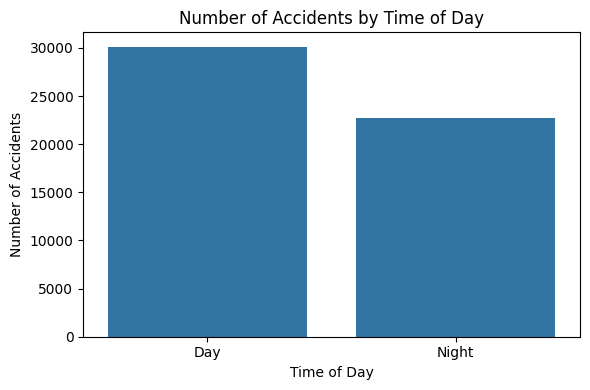

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Time of day', y='accident_count', data=accidents_by_time_of_day)
plt.title('Number of Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

In [ ]:
accidents_by_sa4 = df['SA4 Name 2016'].value_counts().reset_index()
accidents_by_sa4.columns = ['SA4 Name 2016', 'accident_count']
display(accidents_by_sa4.head(10))

,SA4 Name 2016,accident_count
0,Western Australia - Wheat Belt,230
1,South Australia - South East,201
2,Northern Territory - Outback,172
3,Capital Region,167
4,Central West,161
5,Hunter Valley exc Newcastle,156
6,New England and North West,151
7,Wide Bay,146
8,Melbourne - South East,145
9,Barossa - Yorke - Mid North,142


In [ ]:
accidents_by_crash_type = df['Crash Type'].value_counts().reset_index()
accidents_by_crash_type.columns = ['Crash Type', 'accident_count']
display(accidents_by_crash_type)

,Crash Type,accident_count
0,Single,29249
1,Multiple,23594


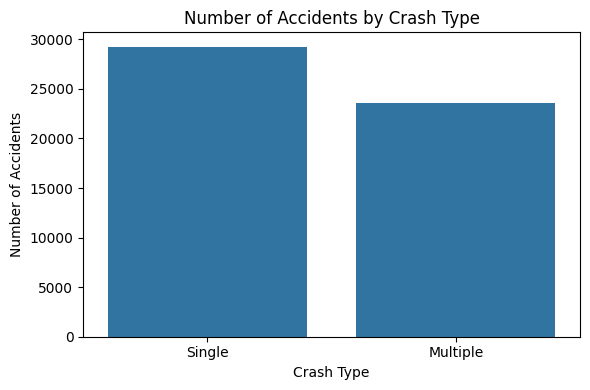

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Crash Type', y='accident_count', data=accidents_by_crash_type)
plt.title('Number of Accidents by Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

In [ ]:
accidents_by_road_user = df['Road User'].value_counts().reset_index()
accidents_by_road_user.columns = ['Road User', 'accident_count']
display(accidents_by_road_user)

,Road User,accident_count
0,Driver,23816
1,Passenger,12269
2,Pedestrian,8242
3,Motorcycle rider,6637
4,Pedal cyclist,1424
5,Motorcycle pillion passenger,363
6,Other/-9,92


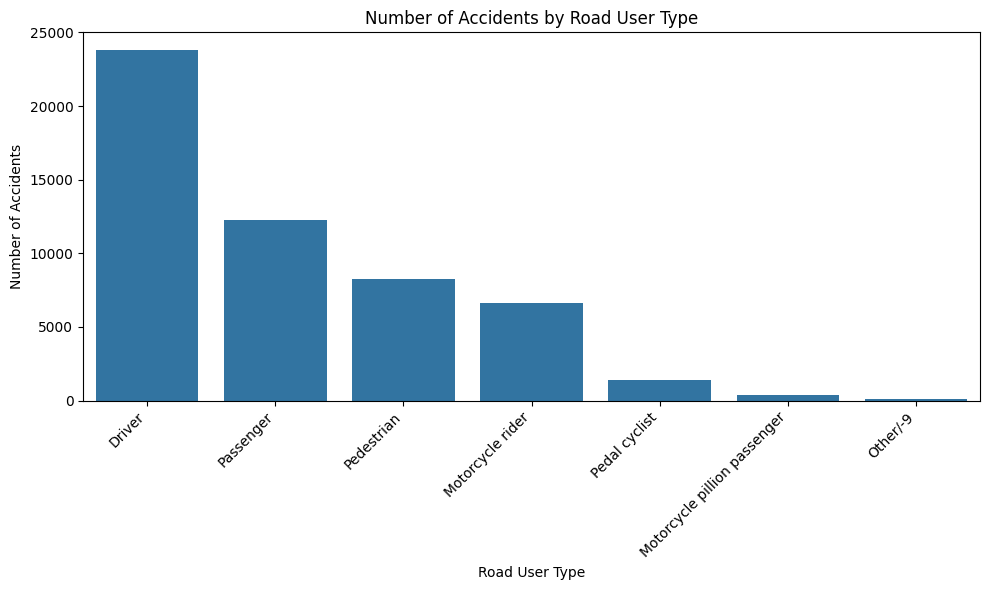

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Road User', y='accident_count', data=accidents_by_road_user)
plt.title('Number of Accidents by Road User Type')
plt.xlabel('Road User Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
accidents_by_age_group = df['Age Group'].value_counts().reset_index()
accidents_by_age_group.columns = ['Age Group', 'accident_count']
display(accidents_by_age_group)

,Age Group,accident_count
0,17_to_25,13771
1,40_to_64,13415
2,26_to_39,12364
3,75_or_older,5110
4,0_to_16,4080
5,65_to_74,4013


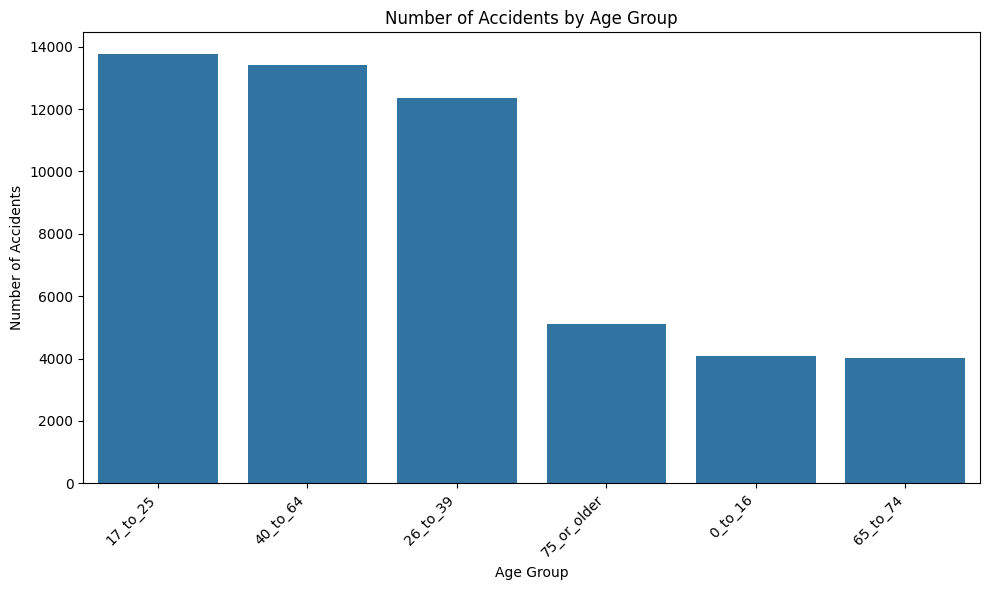

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='accident_count', data=accidents_by_age_group)
plt.title('Number of Accidents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Road Type:** We found that 'National Or State Highway', 'Arterial Road', and 'Local Road' are the types of roads with the highest number of accidents in this dataset. This suggests that a significant portion of accidents occur on major roads and also on local roads.
**Time of Day:** Our analysis showed that more accidents occur during the 'Day' compared to 'Night', with peaks likely corresponding to typical rush hour times.
**Crash Type:** 'Single' vehicle crashes are more frequent than 'Multiple' vehicle crashes in this dataset.
**Road User:** 'Drivers' are the road user type most frequently involved in accidents, followed by 'Passengers' and 'Pedestrians'.
**Age Group:** The age groups '17 to 25', '40 to 64', and '26 to 39' are the most frequently involved in accidents. This highlights the higher accident involvement among younger and middle-aged adults.
